# Modeling Notebook - Group 15

In [1]:
# Import the necessary libraries
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd

In [2]:
#iData = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
pd.set_option('display.max_columns', 500)
iData = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
iData.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


## New Feature 01 : Profit Margin

In [3]:
# Convert the effective date column from 'object' to 'datetime' format
Premium_Start_month =[]
temp2 =[]
iData['Effective To Date'] =  pd.to_datetime(iData['Effective To Date'])
Premium_Start_month = iData['Effective To Date'].dt.month.to_list()

# No of months in which policy is paid in a year = 13 - start_month
for ind, i in zip(iData.index, Premium_Start_month):
    temp2.append(((13-i)*iData['Monthly Premium Auto'][ind])-(iData['Total Claim Amount'][ind]))
        
iData['Profit Margin'] = temp2
iData['Profit Margin'] = iData['Profit Margin'].round(decimals = 2)
iData.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Profit Margin
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,374.19
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,-3.46
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,621.53


## New Feature 02 : Income Class

In [4]:
# Income Groups 
# 0-20K      - "Low income", 
# 200001-60K - "Medium income"
# Above 60K  - High Income 
temp4 =[]
for ind in iData.index:
    if (iData.Income[ind] >= 0) and (iData.Income[ind] <= 20000):
        temp4.append("L")
    elif(iData.Income[ind] > 20000) and (iData.Income[ind] <= 60000):
        temp4.append("M")
    elif(iData.Income[ind] > 60000):
        temp4.append("H")
        
iData['Income Class'] = temp4
iData.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Profit Margin,Income Class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,374.19,M
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,-3.46,L
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,621.53,M


## Outlier reduction

In [5]:
# calculating quarlities based on 30 , 60 and 95 percentile distribution
Q1=np.percentile(iData['Total Claim Amount'],30,interpolation='midpoint')
Q2=np.percentile(iData['Total Claim Amount'],60,interpolation='midpoint')
Q3=np.percentile(iData['Total Claim Amount'],95,interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim=Q3+1.5*IQR
outliers=[]
for i in iData['Total Claim Amount']:
    if i > up_lim:
        outliers.append(i)

print(len(outliers),'possible Oulier(s) is(are) there in Total Claim Amount column and they are given below:\n',outliers)

28 possible Oulier(s) is(are) there in Total Claim Amount column and they are given below:
 [2345.413441, 2027.724442, 2893.239678, 1965.6, 2201.327879, 2294.631639, 2327.166394, 1980.0, 2552.343856, 2042.569089, 2759.794354, 1979.444237, 2270.508697, 1956.368115, 2052.0, 1972.8, 1961.162049, 2306.508397, 2145.6, 1953.87972, 2069.309854, 2156.011022, 1985.999807, 2092.523421, 2275.265075, 2059.2, 2452.894264, 1950.725547]


In [6]:
# Removing outliers from Total claim amount where profit margin is less than 200 dollars in a year
filtered_dataset = iData.loc[iData['Total Claim Amount']>up_lim]
# filtered_dataset[['Total Claim Amount','Profit Margin']].describe()
outliers = filtered_dataset['Profit Margin']<200
outlier_indexes = filtered_dataset.loc[outliers].index.tolist()
print('Indexes of Oulier(s) in Total Claim Amount column are given below:\n',outlier_indexes)

Indexes of Oulier(s) in Total Claim Amount column are given below:
 [888, 1626, 3557, 4930, 4964, 5074, 5773, 7136, 7250, 7978, 8105, 8275, 8684, 8825]


In [7]:
iData.drop([888, 1626, 3557, 4930, 4964, 5074, 5773, 7136, 7250, 7978, 8105, 8275, 8684, 8825],inplace=True)
iData.head(3)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Profit Margin,Income Class
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,374.19,M
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,-3.46,L
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,621.53,M


In [8]:
# Checkpoint 01
iData.to_csv('raw_nonlabeled.csv')

## Feature reduced dataframe

In [10]:
# Duplicate dataset 01
iData01 = iData.drop(['Customer', 'Effective To Date', 'Gender', 'Marital Status', 'Total Claim Amount', 'Vehicle Size', 'Income', 'Location Code'], axis = 1)
iData01.head(3)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Location Code,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Profit Margin,Income Class
0,Washington,2763.519279,No,Basic,Bachelor,Employed,Suburban,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,374.19,M
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,Suburban,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,-3.46,L
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,Suburban,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,621.53,M


In [11]:
# Checkpoint 02
iData01.to_csv('raw_nonlabeled_reduced.csv')

In [12]:
from sklearn.preprocessing import LabelEncoder

cols = []
for i in iData01.columns:
    if iData01[i].dtype == 'object':
        cols.append(i)

labelencoder = LabelEncoder()
mapping =[]
for i in cols:
    iData01[i] = labelencoder.fit_transform(iData01[i])
    lemap = dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
    mapping.append(lemap)

print(f"Mapped labels of the features in iData01 are {mapping}")

Mapped labels of the features in iData01 are [{'Arizona': 0, 'California': 1, 'Nevada': 2, 'Oregon': 3, 'Washington': 4}, {'No': 0, 'Yes': 1}, {'Basic': 0, 'Extended': 1, 'Premium': 2}, {'Bachelor': 0, 'College': 1, 'Doctor': 2, 'High School or Below': 3, 'Master': 4}, {'Disabled': 0, 'Employed': 1, 'Medical Leave': 2, 'Retired': 3, 'Unemployed': 4}, {'Rural': 0, 'Suburban': 1, 'Urban': 2}, {'Corporate Auto': 0, 'Personal Auto': 1, 'Special Auto': 2}, {'Corporate L1': 0, 'Corporate L2': 1, 'Corporate L3': 2, 'Personal L1': 3, 'Personal L2': 4, 'Personal L3': 5, 'Special L1': 6, 'Special L2': 7, 'Special L3': 8}, {'Offer1': 0, 'Offer2': 1, 'Offer3': 2, 'Offer4': 3}, {'Agent': 0, 'Branch': 1, 'Call Center': 2, 'Web': 3}, {'Four-Door Car': 0, 'Luxury Car': 1, 'Luxury SUV': 2, 'SUV': 3, 'Sports Car': 4, 'Two-Door Car': 5}, {'H': 0, 'L': 1, 'M': 2}]


In [13]:
# Checkpoint 03
iData01.to_csv('raw_labeled_reduced.csv')

## Target 01 - Response

In [16]:
# Importing necessary SKLearn goodies
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [33]:
# Splitting the Dataframe
# Independent variables
X = iData01.drop(['Response'], axis=1)
# Dependent variables
y = iData01['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [34]:
# Importing RandomForestClassifier sklearn.ensemble as RFC
from sklearn.ensemble import RandomForestClassifier as RFC
RModel=RFC(n_estimators=100, random_state=42)
# scaler = MinMaxScaler().fit(X_train)
# X_Scaled = scaler.transform(X_train)
# Training the model
RModel.fit(X_train,y_train)
y_Pred=RModel.predict(X_test)

In [35]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_Pred))
print(confusion_matrix(y_test, y_Pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_Pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1563
           1       0.99      1.00      1.00       261

    accuracy                           1.00      1824
   macro avg       1.00      1.00      1.00      1824
weighted avg       1.00      1.00      1.00      1824

[[1561    2]
 [   0  261]]
accuracy is 0.9989035087719298


<AxesSubplot:>

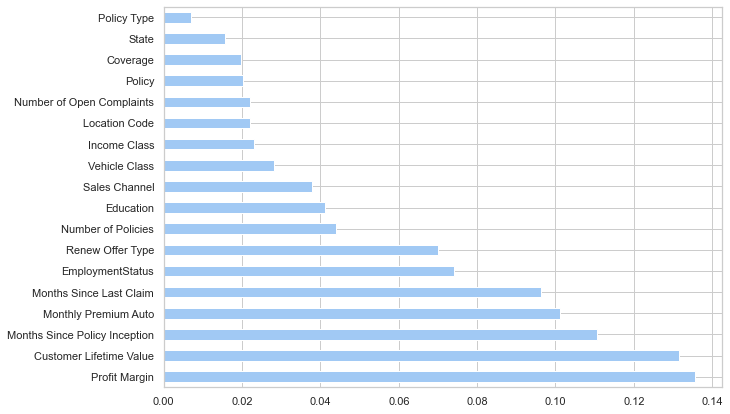

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the 7 most important features 
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid", palette="pastel")
feat_importances = pd.Series(RModel.feature_importances_, index = X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')

### Analysing by feature importance

In [45]:
# Splitting the Dataframe
# Independent variables
X = iData01.drop(['Response', 'Policy Type', 'State', 'Coverage', 'Policy', 'Number of Open Complaints', 'Location Code', 'Income Class'], axis=1)
# Dependent variables
y = iData01['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [47]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_Pred))
print(confusion_matrix(y_test, y_Pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_Pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1563
           1       0.98      1.00      0.99       261

    accuracy                           1.00      1824
   macro avg       0.99      1.00      1.00      1824
weighted avg       1.00      1.00      1.00      1824

[[1559    4]
 [   0  261]]
accuracy is 0.9978070175438597


In [46]:
# Importing RandomForestClassifier sklearn.ensemble as RFC
from sklearn.ensemble import RandomForestClassifier as RFC
RModel=RFC(n_estimators=100, random_state=42)
# scaler = MinMaxScaler().fit(X_train)
# X_Scaled = scaler.transform(X_train)
# Training the model
RModel.fit(X_train,y_train)
y_Pred=RModel.predict(X_test)

In [48]:
X_train.columns

Index(['Customer Lifetime Value', 'Education', 'EmploymentStatus',
       'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Profit Margin'],
      dtype='object')

## Target 02 - Renew Offer Type

In [37]:
# Splitting the Dataframe
# Independent variables
X = iData01.drop(['Renew Offer Type'], axis=1)
# Dependent variables
y = iData01['Renew Offer Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [38]:
RModel=RFC(n_estimators=100, random_state=42)
# Training the model
RModel.fit(X_train,y_train)
y_Pred=RModel.predict(X_test)

In [39]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_Pred))
print(confusion_matrix(y_test, y_Pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_Pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.85      0.67       775
           1       0.54      0.54      0.54       570
           2       0.21      0.03      0.06       290
           3       0.33      0.05      0.09       189

    accuracy                           0.54      1824
   macro avg       0.41      0.37      0.34      1824
weighted avg       0.47      0.54      0.47      1824

[[655  97  18   5]
 [232 310  16  12]
 [200  77  10   3]
 [ 91  85   3  10]]
accuracy is 0.5400219298245614


<AxesSubplot:>

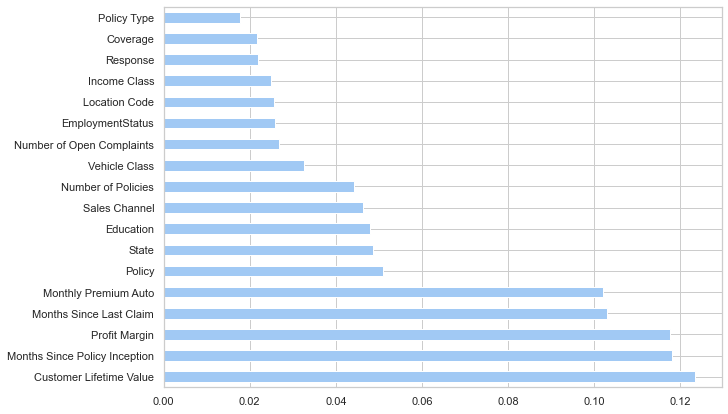

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the 7 most important features 
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid", palette="pastel")
feat_importances = pd.Series(RModel.feature_importances_, index = X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')

### Analysing by feature importance

In [50]:
# Splitting the Dataframe
# Independent variables
X = iData01.drop(['Renew Offer Type', 'Policy Type', 'Coverage', 'Response', 'Income Class', 'Location Code', 'EmploymentStatus', 'Number of Open Complaints'], axis=1)

# Dependent variables
y = iData01['Renew Offer Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [51]:
RModel=RFC(n_estimators=100, random_state=42)
# Training the model
RModel.fit(X_train,y_train)
y_Pred=RModel.predict(X_test)

In [52]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_Pred))
print(confusion_matrix(y_test, y_Pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_Pred,y_test))

              precision    recall  f1-score   support

           0       0.54      0.81      0.65       775
           1       0.51      0.54      0.53       570
           2       0.23      0.04      0.07       290
           3       0.20      0.02      0.04       189

    accuracy                           0.52      1824
   macro avg       0.37      0.35      0.32      1824
weighted avg       0.45      0.52      0.45      1824

[[625 127  16   7]
 [238 309  15   8]
 [198  80  11   1]
 [ 93  87   5   4]]
accuracy is 0.5202850877192983


## Target 03 - Renew Offer Type

In [41]:
# Splitting the Dataframe
# Independent variables
X = iData01.drop(['Customer Lifetime Value'], axis=1)
# Dependent variables
y = iData01['Customer Lifetime Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [42]:
model = GradientBoostingRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

Predictions = model.predict(X_test)
print ("R Squared value of our valuation is:", r2_score(y_test, Predictions))

R Squared value of our valuation is: 0.6858248140701262


<AxesSubplot:>

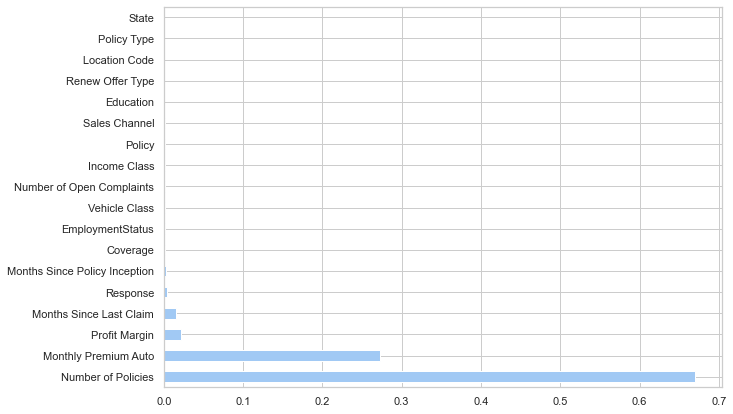

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the 7 most important features 
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid", palette="pastel")
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(18).plot(kind='barh')

### Analysing by feature importance

In [55]:
# Splitting the Dataframe
# Independent variables
X = iData01.drop(['Customer Lifetime Value', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Number of Open Complaints', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Income Class'], axis=1)
# Dependent variables
y = iData01['Customer Lifetime Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [56]:
model = GradientBoostingRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

Predictions = model.predict(X_test)
print ("R Squared value of our valuation is:", r2_score(y_test, Predictions))

R Squared value of our valuation is: 0.6826794321412605


**Avoidable columns : 'Customer Lifetime Value', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Number of Open Complaints', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Income Class'**